In [762]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns
import missingno as mno

In [763]:
db = pd.read_csv("D:\\College\\4th Year\\CS4705\\adult.csv")

In [764]:
db.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [765]:
db.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Clean Dataset 
- Get rid of '?' values and replace with Nan values 

In [766]:
db.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

<AxesSubplot:>

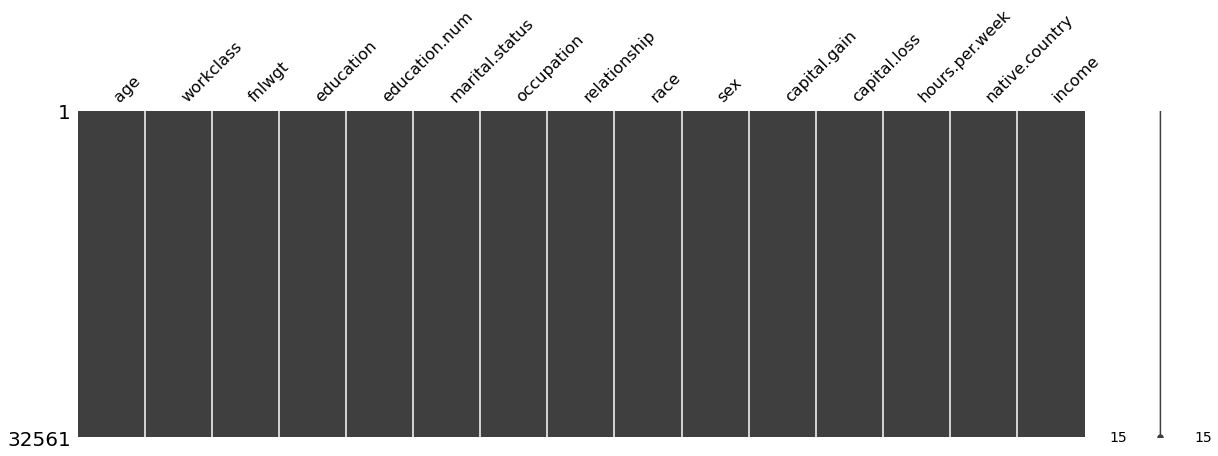

In [767]:
mno.matrix(db, figsize=(20,6))

In [768]:
db['workclass'].replace("?", np.nan, inplace=True)
db['occupation'].replace("?", np.nan, inplace=True)
db['native.country'].replace("?", np.nan, inplace=True)
db

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Mean Imputation
- Simple Mean Imputation -> Replace the missing value of the observation with the mean value for numerical data and the most common or mode value for catergigorical data. 
- Mean Imputation -> Replace the missing value of the observation with a **randomly selected value** from all the observations in the sample that has **similar values on other variables**. Thus, this technique ensures that the imputing value is only selected from the possible interval where the actual value could probably fall, and is randomly selected rather than being determined, which is an essential aspect for a **correct standard error**.

- So considering this explanation, we will group the data by similar attributes first and then use the most frequent value in that group to fill in the missing data in the respective missing fields. 

- Workclass and occupation are related fields. They can be determined by the number of years you spent in education and income level so we will use these factors to determine the missing fields in the workclass and occupation columns. 

### Simple Mean Imputation 

In [769]:
from sklearn.impute import SimpleImputer
imputa = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputa.fit(db)
simpleMeanDF = pd.DataFrame(imputa.transform(db))
simpleMeanDF= simpleMeanDF.rename(columns={0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education.num',5:'marital.status', 6:'occupation',
                       7:'relationship', 8:'race', 9:'sex',10:'capital.gain',11:'capital.loss',12:'hours.per.week',
                       13:'native.country',14:'income'})

### Mean Imputation 

In [770]:
db['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [771]:
db.loc[(db['education.num']>12)]['education'].unique()

array(['Doctorate', 'Prof-school', 'Bachelors', 'Masters'], dtype=object)

In [772]:
higher_educ = db.loc[(db['education.num']>12)&(db['education'].isin(['Doctorate','Bachelors', 'Masters', 'Prof-school']))]

In [773]:
higher_educ_higher_income = higher_educ.loc[higher_educ['income']=='>50K']
higher_educ_Lower_income = higher_educ.loc[higher_educ['income']=='<=50K']

In [774]:
db.loc[(db['education.num']<=12)]['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [775]:
lower_educ = db.loc[(db['education.num']<=12)]

In [776]:
lower_educ_higher_income = lower_educ.loc[lower_educ['income']=='>50K']
lower_educ_lower_income = lower_educ.loc[lower_educ['income']=='<=50K']

In [777]:
db.loc[db['hours.per.week']>60]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
16,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K
29,38,Private,175360,10th,6,Never-married,Prof-specialty,Not-in-family,White,Male,0,2559,90,United-States,>50K
45,48,Private,121253,Bachelors,13,Married-spouse-absent,Sales,Unmarried,White,Female,0,2472,70,United-States,>50K
51,50,Private,237729,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,2444,72,United-States,>50K
60,43,Private,155106,Assoc-acdm,12,Divorced,Craft-repair,Not-in-family,White,Male,0,2444,70,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32482,35,Private,30673,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,84,United-States,<=50K
32501,26,Private,179010,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,<=50K
32523,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K


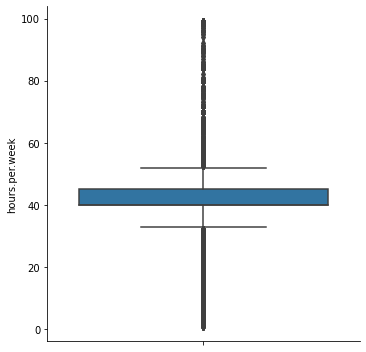

In [778]:
sns.catplot(y='hours.per.week', data=db, kind='box')

In [779]:
db['hours.per.week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

In [780]:
imputa.fit(higher_educ_higher_income)
higher_educ_higher_income = pd.DataFrame(imputa.transform(higher_educ_higher_income))

In [781]:
imputa.fit(higher_educ_Lower_income)
higher_educ_Lower_income = pd.DataFrame(imputa.transform(higher_educ_Lower_income))

In [782]:
imputa.fit(lower_educ_higher_income)
lower_educ_higher_income = pd.DataFrame(imputa.transform(lower_educ_higher_income))

In [783]:
imputa.fit(lower_educ_lower_income)
lower_educ_lower_income = pd.DataFrame(imputa.transform(lower_educ_lower_income))

In [784]:
new_df = pd.concat([higher_educ_higher_income, higher_educ_Lower_income, lower_educ_higher_income, lower_educ_lower_income], ignore_index=True)

In [785]:
new_df= new_df.rename(columns={0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education.num',5:'marital.status', 6:'occupation',
                       7:'relationship', 8:'race', 9:'sex',10:'capital.gain',11:'capital.loss',12:'hours.per.week',
                       13:'native.country',14:'income'})

In [786]:
meanImputationDF = new_df

##  Cold Deck Imputation 
 - Replace the missing data using a value chosen from other variables with similar observation values in this technique. The difference between this technique and the Hot Deck imputation is that the selecting process of the imputing value is not randomized.

In [787]:
coldDeck_db = db[['age', 'workclass', 'education', 'education.num', 'occupation', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']]

In [788]:
coldDeck_db.head()

,age,workclass,education,education.num,occupation,sex,capital.gain,capital.loss,hours.per.week
0,90,NaN,HS-grad,9,NaN,Female,0,4356,40
1,82,Private,HS-grad,9,Exec-managerial,Female,0,4356,18
2,66,NaN,Some-college,10,NaN,Female,0,4356,40
3,54,Private,7th-8th,4,Machine-op-inspct,Female,0,3900,40
4,41,Private,Some-college,10,Prof-specialty,Female,0,3900,40


In [789]:
coldDeck_db['workclass'].isnull().sum()

1836

In [790]:
coldDeck_db['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [791]:
coldDeck_db['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [792]:
def one_hot_workclass(x):
    return np.concatenate([
        (x == "Private"),
        (x == "Self-emp-not-inc"),
        (x == "Local-gov"),
        (x == "State-gov"),
         (x == "Self-emp-inc"),
        (x=="Federal-gov"),
        (x=="Without-pay"),
        (x=="Never-worked")
    ], axis=1).astype(int)

In [793]:
x_workclass=np.array([['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']]).T

In [794]:
x_workclass = one_hot_workclass(x_workclass)
x_workclass

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [795]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(x_workclass)

array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 0.        , 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 0.        , 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 0.        , 1.41421356,
        1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356, 0.        ,
        1.41421356, 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        0.        , 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 0.        , 1.41421356],
       [1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 0.        ]])

### Ordinal Encoder

In [796]:
db2=db.dropna()
null_db = db.loc[db['workclass'].isnull() | db['occupation'].isnull() | db['native.country'].isnull()]
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
db2['workclass_encoded']=labelencoder.fit_transform(db2['workclass'])

<ipython-input-796-0ffd0c572085>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['workclass_encoded']=labelencoder.fit_transform(db2['workclass'])


In [797]:
db2[['workclass', 'workclass_encoded']].sample(20)

,workclass,workclass_encoded
26930,Private,2
8565,Private,2
6110,Local-gov,1
23827,Self-emp-not-inc,4
16788,Private,2
25120,Private,2
26674,Private,2
20786,Private,2
2114,Self-emp-inc,3
12977,Private,2


In [798]:
db2['workclass_encoded']=labelencoder.fit_transform(db2['workclass'])
workclassList= list(labelencoder.classes_)

db2['occupation_encoded']=labelencoder.fit_transform(db2['occupation'])
occupationList = list(labelencoder.classes_)
db2['marital_status_encoded']=labelencoder.fit_transform(db2['marital.status'])
db2['sex_encoded'] = labelencoder.fit_transform(db2['sex'])
db2['relationship_encoded'] = labelencoder.fit_transform(db2['relationship'])
db2['native.country_encoded'] = labelencoder.fit_transform(db2['native.country'])
nativecountryList = list(labelencoder.classes_)
db2['income_encoded'] = labelencoder.fit_transform(db2['income'])

<ipython-input-798-ff4f446ba1b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['workclass_encoded']=labelencoder.fit_transform(db2['workclass'])
<ipython-input-798-ff4f446ba1b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['occupation_encoded']=labelencoder.fit_transform(db2['occupation'])
<ipython-input-798-ff4f446ba1b0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [799]:
null_db['marital_status_encoded']=labelencoder.fit_transform(null_db['marital.status'])
null_db['sex_encoded'] = labelencoder.fit_transform(null_db['sex'])
null_db['relationship_encoded'] = labelencoder.fit_transform(null_db['relationship'])
null_db['income_encoded'] = labelencoder.fit_transform(null_db['income'])
null_db.head()

<ipython-input-799-1d6442fe9716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_db['marital_status_encoded']=labelencoder.fit_transform(null_db['marital.status'])
<ipython-input-799-1d6442fe9716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_db['sex_encoded'] = labelencoder.fit_transform(null_db['sex'])
<ipython-input-799-1d6442fe9716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,6,0,1,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,6,0,4,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K,4,1,4,1
14,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K,4,1,1,1
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K,4,1,1,1


In [800]:
encoded_df = db2[['age','education.num', 'marital_status_encoded', 'sex_encoded', 'relationship_encoded', 'income_encoded', 'hours.per.week' ]].reset_index(drop=True)
encoded_df.head()

,age,education.num,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded,hours.per.week
0,82,9,6,0,1,0,18
1,54,4,0,0,4,0,40
2,41,10,5,0,3,0,40
3,34,9,0,0,4,0,45
4,38,6,5,1,4,0,40


In [801]:
from sklearn.cluster import KMeans 
matr=encoded_df.values
km=sklearn.cluster.KMeans(n_clusters=8)
km.fit(matr)
labels=km.labels_
results=pd.DataFrame([encoded_df.index,labels]).T

In [802]:
db2['cluster_num'] = [x for x in results[1]]

<ipython-input-802-d310187baafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['cluster_num'] = [x for x in results[1]]


In [803]:
null_db2 =null_db[['age', 'education.num', 'marital_status_encoded', 'sex_encoded', 'relationship_encoded', 'income_encoded', 'hours.per.week']]

In [804]:
x = km.predict(null_db2)
null_db2['cluster_num'] = [num for num in x]
null_db2

<ipython-input-804-4041b36bde78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_db2['cluster_num'] = [num for num in x]


,age,education.num,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded,hours.per.week,cluster_num
0,90,9,6,0,1,0,40,6
2,66,10,6,0,4,0,40,6
9,41,10,4,1,4,1,60,1
14,51,16,4,1,1,1,40,6
18,22,12,4,1,1,1,40,2
...,...,...,...,...,...,...,...,...
32533,35,13,2,0,5,1,55,5
32534,30,13,4,0,1,0,99,3
32541,71,16,2,1,0,1,10,0
32543,41,9,5,0,1,0,32,4


In [805]:
null_db['cluster_num2'] = [num for num in x]

<ipython-input-805-76b9f53ec472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_db['cluster_num2'] = [num for num in x]


In [806]:
null_db = null_db.reset_index(drop=True)
null_db.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded,cluster_num2
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,6,0,1,0,6
1,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,6,0,4,0,6
2,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K,4,1,4,1,1
3,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,>50K,4,1,1,1,6
4,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K,4,1,1,1,2


In [807]:
medians = []
for x in range(8):    
    x_median = []
    sampleDb = db2.loc[db2['cluster_num']==x]
    workclass_median = sampleDb['workclass'].value_counts().index[0]
    x_median.append(workclass_median)
    occupation_median = sampleDb['occupation'].value_counts().index[0]
    x_median.append(occupation_median)
    nativeCountry_median = sampleDb['native.country'].value_counts().index[0]
    x_median.append(nativeCountry_median)
    medians.append(x_median)
    

In [808]:
medians

[['Private', 'Other-service', 'United-States'],
 ['Private', 'Exec-managerial', 'United-States'],
 ['Private', 'Adm-clerical', 'United-States'],
 ['Private', 'Prof-specialty', 'United-States'],
 ['Private', 'Craft-repair', 'United-States'],
 ['Private', 'Exec-managerial', 'United-States'],
 ['Private', 'Craft-repair', 'United-States'],
 ['Private', 'Other-service', 'United-States']]

In [809]:
for x in range(len(null_db)):
    if pd.isna(null_db.loc[x,'workclass']):
        null_db.loc[x,'workclass'] = medians[null_db.loc[x,'cluster_num2']][0]
    if pd.isna(null_db.loc[x,'occupation']):
        null_db.loc[x,'occupation'] = medians[null_db.loc[x,'cluster_num2']][1]
    if pd.isna(null_db.loc[x,'native.country']):
        null_db.loc[x,'native.country'] = medians[null_db.loc[x,'cluster_num2']][2]

In [810]:
null_db.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded,cluster_num2
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,<=50K,6,0,1,0,6
1,66,Private,186061,Some-college,10,Widowed,Craft-repair,Unmarried,Black,Female,0,4356,40,United-States,<=50K,6,0,4,0,6
2,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K,4,1,4,1,1
3,51,Private,172175,Doctorate,16,Never-married,Craft-repair,Not-in-family,White,Male,0,2824,40,United-States,>50K,4,1,1,1,6
4,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,United-States,>50K,4,1,1,1,2


In [811]:
db2 = db2.reset_index(drop=True)
null_db = null_db.reset_index(drop=True)
db2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,native.country,income,workclass_encoded,occupation_encoded,marital_status_encoded,sex_encoded,relationship_encoded,native.country_encoded,income_encoded,cluster_num
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,United-States,<=50K,2,3,6,0,1,38,0,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,United-States,<=50K,2,6,0,0,4,38,0,6
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,United-States,<=50K,2,9,5,0,3,38,0,4
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,United-States,<=50K,2,7,0,0,4,38,0,4
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,United-States,<=50K,2,0,5,1,4,38,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,...,United-States,<=50K,2,10,4,1,1,38,0,2
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,United-States,<=50K,2,12,2,0,5,38,0,2
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,United-States,>50K,2,6,2,1,0,38,1,4
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,United-States,<=50K,2,0,6,0,4,38,0,6


In [812]:
coldDeckDF = pd.concat([db2, null_db]).reset_index(drop=True)

In [813]:
coldDeckDF.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_encoded', 'occupation_encoded',
       'marital_status_encoded', 'sex_encoded', 'relationship_encoded',
       'native.country_encoded', 'income_encoded', 'cluster_num',
       'cluster_num2'],
      dtype='object')

In [814]:
coldDeckDF = coldDeckDF[list(db.columns)]

In [815]:
coldDeckDF.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Regression Imputation

In [816]:
regression_db = db.dropna()
regression_null_db = db.loc[db['workclass'].isnull() | db['occupation'].isnull() | db['native.country'].isnull()]

<AxesSubplot:>

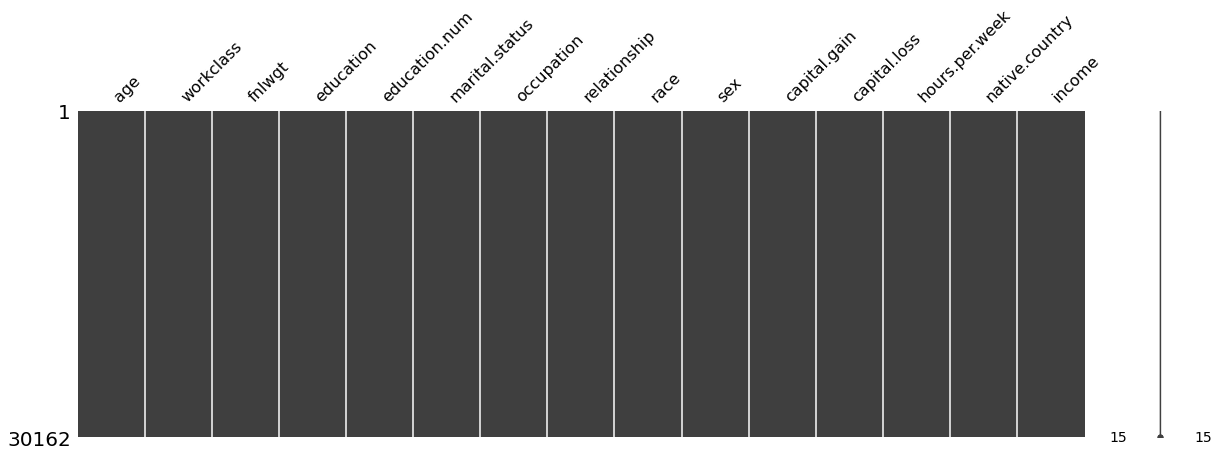

In [817]:
mno.matrix(regression_db, figsize = (20, 6))

<AxesSubplot:>

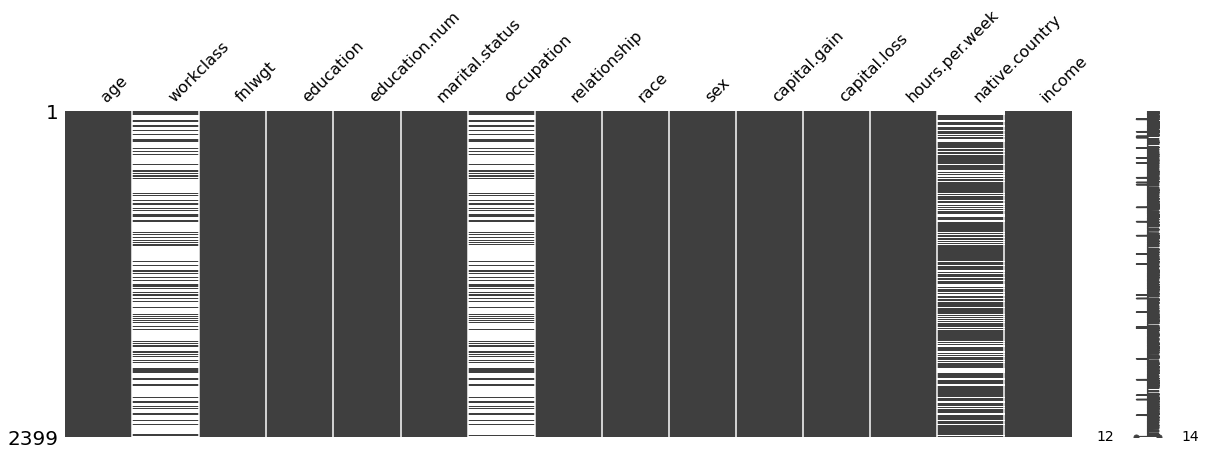

In [818]:
mno.matrix(regression_null_db, figsize=(20,6))

In [819]:
regression_db.corr(method='spearman')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.078438,0.070416,0.121936,0.061171,0.155916
fnlwgt,-0.078438,1.000000,-0.035712,-0.007336,-0.007970,-0.025688
education.num,0.070416,-0.035712,1.000000,0.120848,0.074593,0.168448
capital.gain,0.121936,-0.007336,0.120848,1.000000,-0.067435,0.095189
capital.loss,0.061171,-0.007970,0.074593,-0.067435,1.000000,0.058599
hours.per.week,0.155916,-0.025688,0.168448,0.095189,0.058599,1.000000


In [820]:
from sklearn import linear_model
%matplotlib inline

In [821]:
missing_columns = ['workclass', 'occupation', 'native.country']

In [822]:
db2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_encoded', 'occupation_encoded',
       'marital_status_encoded', 'sex_encoded', 'relationship_encoded',
       'native.country_encoded', 'income_encoded', 'cluster_num'],
      dtype='object')

In [823]:
db_regression = db2[['age', 'fnlwgt', 'education.num',
       'capital.gain', 'capital.loss', 'hours.per.week',
        'workclass_encoded', 'occupation_encoded',
       'marital_status_encoded', 'sex_encoded', 'relationship_encoded','native.country_encoded',
       'income_encoded']]

In [824]:
db_regression.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_encoded,occupation_encoded,marital_status_encoded,sex_encoded,relationship_encoded,native.country_encoded,income_encoded
0,82,132870,9,0,4356,18,2,3,6,0,1,38,0
1,54,140359,4,0,3900,40,2,6,0,0,4,38,0
2,41,264663,10,0,3900,40,2,9,5,0,3,38,0
3,34,216864,9,0,3770,45,2,7,0,0,4,38,0
4,38,150601,6,0,3770,40,2,0,5,1,4,38,0


In [825]:
regression_null_db['marital_status_encoded']=labelencoder.fit_transform(regression_null_db['marital.status'])
regression_null_db['sex_encoded'] = labelencoder.fit_transform(regression_null_db['sex'])
regression_null_db['relationship_encoded'] = labelencoder.fit_transform(regression_null_db['relationship'])
regression_null_db['income_encoded'] = labelencoder.fit_transform(regression_null_db['income'])

<ipython-input-825-c2259670113d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_null_db['marital_status_encoded']=labelencoder.fit_transform(regression_null_db['marital.status'])
<ipython-input-825-c2259670113d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_null_db['sex_encoded'] = labelencoder.fit_transform(regression_null_db['sex'])
<ipython-input-825-c2259670113d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [826]:
regression_null_db = regression_null_db.reset_index(drop=True)

In [827]:
regression_null_db_encoded = regression_null_db[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week','marital_status_encoded', 'sex_encoded','relationship_encoded', 'income_encoded']]

In [828]:
regression_null_db_encoded.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,marital_status_encoded,sex_encoded,relationship_encoded,income_encoded
0,90,77053,9,0,4356,40,6,0,1,0
1,66,186061,10,0,4356,40,6,0,4,0
2,41,70037,10,0,3004,60,4,1,4,1
3,51,172175,16,0,2824,40,4,1,1,1
4,22,119592,12,0,2824,40,4,1,1,1


In [829]:
missing_columns

['workclass', 'occupation', 'native.country']

In [830]:
parameters = list(regression_null_db_encoded.columns)


In [831]:
final_o = []
for mc in missing_columns: 
    output=[]
    model = linear_model.LinearRegression()
    model.fit(X = db_regression[parameters], y = db_regression[mc + "_encoded"])
    
    y = model.predict(regression_null_db_encoded[parameters])
    round_y = np.round(y)
    output = round_y.tolist()
    final_o.append(output)

In [832]:
for x in range(len(regression_null_db)):
    if pd.isna(regression_null_db.loc[x,'workclass']):
        regression_null_db.loc[x,'workclass'] = final_o[0][x]
    if pd.isna(regression_null_db.loc[x,'occupation']):
        regression_null_db.loc[x,'occupation'] = final_o[1][x]
    if pd.isna(regression_null_db.loc[x,'native.country']):
        regression_null_db.loc[x,'native.country'] = final_o[2][x]

In [833]:
regression_null_db = regression_null_db[db.columns].reset_index(drop=True)
regression_null_db

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,77053,HS-grad,9,Widowed,6,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,66,2,186061,Some-college,10,Widowed,6,Unmarried,Black,Female,0,4356,40,United-States,<=50K
2,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,37,>50K
3,51,2,172175,Doctorate,16,Never-married,7,Not-in-family,White,Male,0,2824,40,United-States,>50K
4,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,37,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,35,2,320084,Bachelors,13,Married-civ-spouse,6,Wife,White,Female,0,0,55,United-States,>50K
2395,30,2,33811,Bachelors,13,Never-married,6,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
2396,71,2,287372,Doctorate,16,Married-civ-spouse,7,Husband,White,Male,0,0,10,United-States,>50K
2397,41,2,202822,HS-grad,9,Separated,6,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [834]:
new_db = db2[db.columns].reset_index(drop=True)

In [835]:
regressionDF = pd.concat([new_db, regression_null_db]).reset_index(drop=True)

In [836]:
workclassList

['Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay']

In [837]:
occupationList

['Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving']

In [838]:
workclassList

['Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay']

In [839]:
regressionDF['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
2.0                  1822
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
3.0                    14
Never-worked            7
Name: workclass, dtype: int64

In [840]:
for x in range(len(regressionDF)):
    if regressionDF.loc[x, 'workclass'] == 2.0:
        regressionDF.loc[x,'workclass'] = workclassList[2]
    elif regressionDF.loc[x,'workclass']==3.0:
        regressionDF.loc[x,'workclass'] = workclassList[3]

In [841]:
regressionDF['workclass'].value_counts()

Private             24518
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1130
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [842]:
regressionDF['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
6.0                  1263
Farming-fishing       994
Tech-support          928
Protective-serv       649
5.0                   437
Priv-house-serv       149
7.0                   134
Armed-Forces            9
4.0                     9
Name: occupation, dtype: int64

In [843]:
for x in range(len(regressionDF)):
    if regressionDF.loc[x, 'occupation'] == 4.0:
        regressionDF.loc[x,'occupation'] = occupationList[4]
    elif regressionDF.loc[x,'occupation']==5.0:
        regressionDF.loc[x,'occupation'] = occupationList[5]
    elif regressionDF.loc[x,'occupation']==6.0:
        regressionDF.loc[x,'occupation'] = occupationList[6]
    elif regressionDF.loc[x,'occupation']==7.0:
        regressionDF.loc[x,'occupation'] = occupationList[7]

In [844]:
regressionDF['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3429
Machine-op-inspct    3265
Handlers-cleaners    1807
Transport-moving     1597
Farming-fishing      1003
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [845]:
regressionDF['native.country'].value_counts()

United-States                 29170
Mexico                          643
37.0                            249
36.0                            225
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
35.0                             61
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
38.0                             43
Portugal                    

In [846]:
for x in range(len(regressionDF)):
    if regressionDF.loc[x, 'native.country'] == 34.0:
        regressionDF.loc[x,'native.country'] = nativecountryList[34]
    elif regressionDF.loc[x, 'native.country'] == 35.0:
        regressionDF.loc[x,'native.country'] = nativecountryList[35]
    elif regressionDF.loc[x, 'native.country'] == 36.0:
        regressionDF.loc[x,'native.country'] = nativecountryList[36]
    elif regressionDF.loc[x, 'native.country'] == 37.0:
        regressionDF.loc[x,'native.country'] = nativecountryList[37]
    elif regressionDF.loc[x, 'native.country'] == 38.0:
        regressionDF.loc[x,'native.country'] = nativecountryList[38]

In [847]:
regressionDF['native.country'].value_counts()

United-States                 29213
Mexico                          643
Trinadad&Tobago                 268
Thailand                        243
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
Taiwan                          112
El-Salvador                     106
India                           100
Cuba                             95
England                          90
South                            85
Jamaica                          81
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                        

## Splitting Data into Training and Test Data

- Splitting the data into 80% training and 20% test

In [848]:
from sklearn.model_selection import train_test_split

In [849]:
simpleMeanDF_model = simpleMeanDF
coldDeckDF_model = coldDeckDF
regressionDF_model = regressionDF

In [850]:
cat_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship','race','sex', 'native.country', 'income']
modellabelencoder = LabelEncoder()
for x in cat_columns: 
    simpleMeanDF_model[x + "_enc"] = modellabelencoder.fit_transform(simpleMeanDF_model[x])
    coldDeckDF_model[x + "_enc"] = modellabelencoder.fit_transform(coldDeckDF_model[x])
    regressionDF_model[x + "_enc"] = modellabelencoder.fit_transform(regressionDF_model[x])

### Simple Mean Imputation DataFrame

In [851]:
simpleMeanDF_model.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_enc', 'education_enc', 'marital.status_enc',
       'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'native.country_enc', 'income_enc'],
      dtype='object')

In [852]:
x = simpleMeanDF_model[['age', 'workclass_enc', 'fnlwgt', 'education_enc', 'education.num',
       'marital.status_enc', 'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country_enc']]
y = simpleMeanDF_model['income_enc']
mean_x_train, mean_x_test, mean_y_train, mean_y_test = train_test_split(x,y, test_size=0.2, random_state=1)

### Cold Deck Imputation DataFrame

In [853]:
coldDeckDF_model.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_enc', 'education_enc', 'marital.status_enc',
       'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'native.country_enc', 'income_enc'],
      dtype='object')

In [854]:
x = coldDeckDF_model[['age', 'workclass_enc', 'fnlwgt', 'education_enc', 'education.num',
       'marital.status_enc', 'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country_enc']]
y = coldDeckDF_model['income_enc']
cd_x_train, cd_x_test, cd_y_train, cd_y_test = train_test_split(x,y, test_size=0.2, random_state=1)

### Regression Imputation DataFrame

In [855]:
regressionDF_model.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_enc', 'education_enc', 'marital.status_enc',
       'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'native.country_enc', 'income_enc'],
      dtype='object')

In [856]:
x = regressionDF[['age', 'workclass_enc', 'fnlwgt', 'education_enc', 'education.num',
       'marital.status_enc', 'occupation_enc', 'relationship_enc', 'race_enc', 'sex_enc',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country_enc']]
y = regressionDF_model['income_enc']
r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Modelling

### Decision Tree

In [857]:
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

In [903]:
clf = tree.DecisionTreeClassifier()
clf.fit(mean_x_train, mean_y_train)
mean_pred = clf.predict(mean_x_test)
mean_acc = accuracy_score(mean_y_test, mean_pred)*100
print("Mean Imputation DataFrame accuracy {}%".format(accuracy_score(mean_y_test, mean_pred)*100))
MSE = mean_squared_error(mean_y_test, mean_pred)
RMSE = np.sqrt(MSE)
print("RMSE of Mean Imputation DF = {}".format(RMSE))
cm = confusion_matrix(mean_y_test, mean_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(mean_y_test, mean_pred))

Mean Imputation DataFrame accuracy 80.76155381544604%
RMSE of Mean Imputation DF = 0.4386165316601048
Confusion matrix

 [[4307  636]
 [ 617  953]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4943
           1       0.60      0.61      0.60      1570

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [904]:
clf.fit(cd_x_train, cd_y_train)
cd_pred = clf.predict(cd_x_test)
cd_acc = accuracy_score(cd_y_test, cd_pred)*100
print("Cold Deck Imputation DataFrame accuracy {}%".format(accuracy_score(cd_y_test, cd_pred)*100))
MSE = mean_squared_error(cd_y_test, cd_pred)
RMSE = np.sqrt(MSE)
print("RMSE of Cold Deck Imputation DF = {}".format(RMSE))
cm = confusion_matrix(cd_y_test, cd_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(cd_y_test, cd_pred))

Cold Deck Imputation DataFrame accuracy 81.72884999232305%
RMSE of Cold Deck Imputation DF = 0.42744765770415627
Confusion matrix

 [[4350  611]
 [ 579  973]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.61      0.63      0.62      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [905]:
clf.fit(r_x_train, r_y_train)
r_pred = clf.predict(r_x_test)
r_acc = accuracy_score(r_y_test, r_pred)*100
print("Deterministic Regression Imputation DataFrame accuracy {}%".format(accuracy_score(r_y_test, r_pred)*100))
MSE = mean_squared_error(r_y_test, r_pred)
RMSE = np.sqrt(MSE)
print("RMSE of Deterministic Regression Imputation DF = {}".format(RMSE))
cm = confusion_matrix(r_y_test, r_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(r_y_test, r_pred))

Deterministic Regression Imputation DataFrame accuracy 82.05128205128204%
RMSE of Deterministic Regression Imputation DF = 0.4236592728681617
Confusion matrix

 [[4334  627]
 [ 542 1010]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.62      0.65      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### Decision Forest

In [861]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

In [907]:
clf.fit(mean_x_train, mean_y_train)
mean_pred_rf = clf.predict(mean_x_test)
rf_mean_acc = accuracy_score(mean_y_test, mean_pred_rf)*100
print("Mean Imputation DataFrame accuracy {}%".format(accuracy_score(mean_y_test, mean_pred_rf)*100))
MSE = mean_squared_error(mean_y_test, mean_pred_rf)
RMSE = np.sqrt(MSE)
print("RMSE of Mean Imputation DF = {}".format(RMSE))
print(classification_report(mean_y_test, mean_pred_rf))

Mean Imputation DataFrame accuracy 80.7154920927376%
RMSE of Mean Imputation DF = 0.43914129738914787
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4943
           1       0.60      0.61      0.60      1570

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [908]:
clf.fit(cd_x_train, cd_y_train)
cd_pred_rf = clf.predict(cd_x_test)
rf_cd_acc = accuracy_score(cd_y_test, cd_pred_rf)*100
print("Cold Deck Imputation DataFrame accuracy {}%".format(accuracy_score(cd_y_test, cd_pred_rf)*100))
MSE = mean_squared_error(cd_y_test, cd_pred_rf)
RMSE = np.sqrt(MSE)
print("RMSE of Cold Deck Imputation DF = {}".format(RMSE))
print(classification_report(cd_y_test, cd_pred_rf))

Cold Deck Imputation DataFrame accuracy 81.86703516044832%
RMSE of Cold Deck Imputation DF = 0.4258281911704727
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.62      0.63      0.62      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [909]:
clf.fit(r_x_train, r_y_train)
r_pred_rf = clf.predict(r_x_test)
rf_r_acc = accuracy_score(r_y_test, r_pred_rf)*100
print("Deterministic Regression Imputation DataFrame accuracy {}%".format(accuracy_score(r_y_test, r_pred_rf)*100))
MSE = mean_squared_error(r_y_test, r_pred_rf)
RMSE = np.sqrt(MSE)
print("RMSE of Deterministic Regression Imputation DF = {}".format(RMSE))
print(classification_report(r_y_test, r_pred_rf))

Deterministic Regression Imputation DataFrame accuracy 81.72884999232305%
RMSE of Deterministic Regression Imputation DF = 0.42744765770415627
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.61      0.64      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.82      0.82      6513



### Naive Bayes (Multinomial)

In [865]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [910]:
clf.fit(mean_x_train, mean_y_train)
mean_pred_nbM = clf.predict(mean_x_test)
nbm_mean_acc = accuracy_score(mean_y_test, mean_pred_nbM)*100
print("Mean Imputation DataFrame accuracy {}%".format(accuracy_score(mean_y_test, mean_pred_nbM)*100))
MSE = mean_squared_error(mean_y_test, mean_pred_nbM)
RMSE = np.sqrt(MSE)
print("RMSE of Mean Imputation DF = {}".format(RMSE))
print(classification_report(mean_y_test, mean_pred_nbM))

Mean Imputation DataFrame accuracy 81.0993397819745%
RMSE of Mean Imputation DF = 0.4347488955480564
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4943
           1       0.61      0.61      0.61      1570

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [911]:
clf.fit(cd_x_train, cd_y_train)
cd_pred_nbM = clf.predict(cd_x_test)
nbm_cd_acc = accuracy_score(cd_y_test, cd_pred_nbM)*100
print("Cold Deck Imputation DataFrame accuracy {}%".format(accuracy_score(cd_y_test, cd_pred_nbM)*100))
MSE = mean_squared_error(cd_y_test, cd_pred_nbM)
RMSE = np.sqrt(MSE)
print("RMSE of Cold Deck Imputation DF = {}".format(RMSE))
print(classification_report(cd_y_test, cd_pred_nbM))

Cold Deck Imputation DataFrame accuracy 82.05128205128204%
RMSE of Cold Deck Imputation DF = 0.4236592728681617
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.62      0.63      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [912]:
clf.fit(r_x_train, r_y_train)
r_pred_nbM = clf.predict(r_x_test)
nbm_r_acc = accuracy_score(r_y_test, r_pred_nbM)*100
print("Deterministic regression Imputation DataFrame accuracy {}%".format(accuracy_score(r_y_test, r_pred_nbM)*100))
MSE = mean_squared_error(r_y_test, r_pred_nbM)
RMSE = np.sqrt(MSE)
print("RMSE of Deterministic Regression Imputation DF = {}".format(RMSE))
print(classification_report(r_y_test, r_pred_nbM))

Deterministic regression Imputation DataFrame accuracy 81.92845079072623%
RMSE of Deterministic Regression Imputation DF = 0.42510644795478886
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.61      0.65      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### Naive Bayes (Gaussian)

In [869]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [913]:
clf.fit(mean_x_train, mean_y_train)
mean_pred_nbG = clf.predict(mean_x_test)
nbg_mean_acc = accuracy_score(mean_y_test, mean_pred_nbG)*100
print("Mean Imputation DataFrame accuracy {}%".format(accuracy_score(mean_y_test, mean_pred_nbG)*100))
MSE = mean_squared_error(mean_y_test, mean_pred_nbG)
RMSE = np.sqrt(MSE)
print("RMSE of Mean Imputation DF = {}".format(RMSE))
print(classification_report(mean_y_test, mean_pred_nbG))

Mean Imputation DataFrame accuracy 80.74619990787656%
RMSE of Mean Imputation DF = 0.43879152330148136
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4943
           1       0.60      0.61      0.60      1570

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [914]:
clf.fit(cd_x_train, cd_y_train)
cd_pred_nbG = clf.predict(cd_x_test)
nbg_cd_acc = accuracy_score(cd_y_test, cd_pred_nbG)*100
print("Cold Deck Imputation DataFrame accuracy {}%".format(accuracy_score(cd_y_test, cd_pred_nbG)*100))
MSE = mean_squared_error(cd_y_test, cd_pred_nbG)
RMSE = np.sqrt(MSE)
print("RMSE of Cold Deck Imputation DF = {}".format(RMSE))
print(classification_report(cd_y_test, cd_pred_nbG))

Cold Deck Imputation DataFrame accuracy 82.12805158912944%
RMSE of Cold Deck Imputation DF = 0.42275227274221205
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.62      0.64      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



In [915]:
clf.fit(r_x_train, r_y_train)
r_pred_nbG = clf.predict(r_x_test)
nbg_r_acc = accuracy_score(r_y_test, r_pred_nbG)*100
print("Deterministic Regression Imputation DataFrame accuracy {}%".format(accuracy_score(r_y_test, r_pred_nbG)*100))
MSE = mean_squared_error(r_y_test, r_pred_nbG)
RMSE = np.sqrt(MSE)
print("RMSE of Deterministic Regression Imputation DF = {}".format(RMSE))
print(classification_report(r_y_test, r_pred_nbG))

Deterministic Regression Imputation DataFrame accuracy 82.1434054966989%
RMSE of Deterministic Regression Imputation DF = 0.4225706391042933
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.62      0.65      0.63      1552

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### Bayesian Network

In [873]:
!pip install pgmpy

In [874]:
from pgmpy.models import BayesianModel
from  pgmpy.factors.discrete import TabularCPD

## Quality of different Imputation Methods

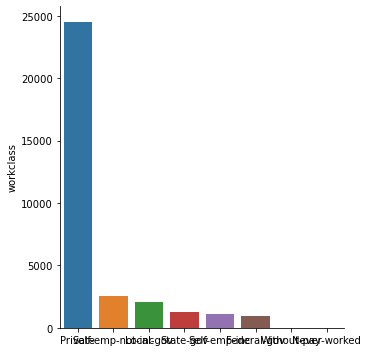

In [875]:
sns.catplot(x=['Private','Self-emp-not-inc','Local-gov', 'State-gov', 'Self-emp-inc','Federal-gov','Without-pay', 'Never-worked'], 
        y=simpleMeanDF['workclass'].value_counts(),
        data=simpleMeanDF,
        kind="bar")

In [876]:
simpleMeanListw = list(simpleMeanDF['workclass'].value_counts())
coldDeckListw = list(coldDeckDF['workclass'].value_counts())
regressionListw = list(regressionDF['workclass'].value_counts())

In [877]:
quality = pd.DataFrame()

In [878]:
quality['sector'] = ['Private','Self-emp-not-inc','Local-gov', 'State-gov', 'Self-emp-inc','Federal-gov','Without-pay', 'Never-worked']
quality['simpleMean'] = simpleMeanListw
quality['coldDeck'] = coldDeckListw
quality['Regression'] = regressionListw

In [879]:
quality

,sector,simpleMean,coldDeck,Regression
0,Private,24532,24532,24518
1,Self-emp-not-inc,2541,2541,2541
2,Local-gov,2093,2093,2093
3,State-gov,1298,1298,1298
4,Self-emp-inc,1116,1116,1130
5,Federal-gov,960,960,960
6,Without-pay,14,14,14
7,Never-worked,7,7,7


For the workclass column, both simple mean imputation and cold deck imputation provided the same results. Their count for each unique variable is equal to one another. However, for Deterministic regression imputation we get marginally different values which is a result of deeper classification of the data and not just applying the most frequent count which is what occurs in cold deck and simple mean imputation 

In [880]:
simpleMeanDF['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

[Text(0, 0.5, 'Occupation_count')]

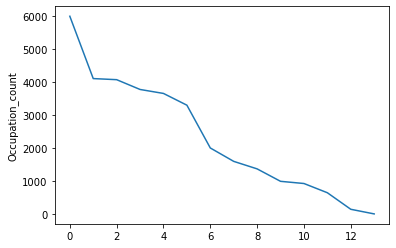

In [881]:
plot = sns.lineplot(y=simpleMeanDF['occupation'].value_counts(), x=range(0,14))
plot.set(ylabel="Occupation_count")

In [882]:
coldDeckDF['occupation'].value_counts()

Craft-repair         4593
Adm-clerical         4316
Exec-managerial      4172
Prof-specialty       4165
Other-service        3967
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

[Text(0, 0.5, 'Occupation_count')]

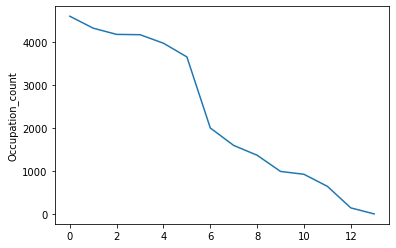

In [883]:
plot = sns.lineplot(y=coldDeckDF['occupation'].value_counts(), x=range(0,14))
plot.set(ylabel="Occupation_count")

In [884]:
regressionDF['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3429
Machine-op-inspct    3265
Handlers-cleaners    1807
Transport-moving     1597
Farming-fishing      1003
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

[Text(0, 0.5, 'Occupation_count')]

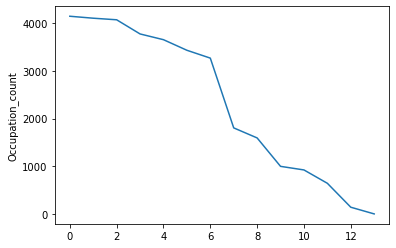

In [885]:
plot = sns.lineplot(y=regressionDF['occupation'].value_counts(), x=range(0,14))
plot.set(ylabel="Occupation_count")

For simple Mean Imputation, the top value of 'prof-specialty' has a significantly higher value than the rest of the other occupations in the same DataFrame. This is a result of applying the most frequent value to all Nan values. This is not the case in ColdDeck and Regression Imputation because the values are clustered and classified based on other features values. We see occupation values are closer together before there is a drop off after 'Machine-op-inspect' but this is replicated in both of the DataFrames. Clustering and classifying based on other feature values gives a more accurate prediction in this case. 

In [886]:
simpleMeanDF['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [887]:
coldDeckDF['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [888]:
regressionDF['native.country'].value_counts()

United-States                 29213
Mexico                          643
Trinadad&Tobago                 268
Thailand                        243
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
Taiwan                          112
El-Salvador                     106
India                           100
Cuba                             95
England                          90
South                            85
Jamaica                          81
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                        

Similar to workclass, mean imputation and cold Deck provide the same results on the missing values because we are applying the most frequent value to the missing value. Even though in Cold Deck imputation when we are clusting the data based on multiple features in the dataframe, 'United States' fills approximately 90% of the data for native.country and so will be the most frequent country in all clusters. In regression imputation, the deterministic regression model classify's the data better and this is shown by a smaller value for the 'united states' and a larger values for 'Trinidad & Tabago', 'Thailand' etc. 

Considering the classification of the missing values using these three different methods for the three columns with missing data, in my opinion, deterministic regression yields the best results as we are classifying the data based on the different features and not just applying the most frequent value. Even for Cold Deck when we cluster the data, if there is a significantly larger count for a variable in the feature, such as 'united states' in native.country, the clustering will have no impact as the significantly larger value will be the most frequent value in every cluster and so applied to all missing values in that column. This is exactly what we see in the native.country and workclass columns for colddeck imputation. The only way this may be eradicated is by creating a significantly larger number of clusters but that will result in an overfitting of the training data when it comes to training a model. Mean imputation is the easiest and quickest to apply to the data, but however, doesn't yield the same variability in results as deterministic regression imputation does. 

## Model Evaluation

In [921]:
# Decision Tree 
print("DecisionTree \n{}\n{}\n{}\n".format(mean_acc, cd_acc, r_acc))

DecisionTree 
80.76155381544604
81.72884999232305
82.05128205128204



In [923]:
print("Random Forest \n{}\n{}\n{}".format(rf_mean_acc, rf_cd_acc, rf_r_acc))

Random Forest 
80.7154920927376
81.86703516044832
81.72884999232305


In [925]:
print("Naive Bayes Multinomial \n{}\n{}\n{}".format(nbm_mean_acc,nbm_cd_acc, nbm_r_acc))

Naive Bayes Multinomial 
81.0993397819745
82.05128205128204
81.92845079072623


In [926]:
print("Naive Bayes Gaussian \n{}\n{}\n{}".format(nbg_mean_acc,nbg_cd_acc,nbg_r_acc))

Naive Bayes Gaussian 
80.74619990787656
82.12805158912944
82.1434054966989


In [906]:
DecisionTree = mean_acc + cd_acc + r_acc
DecisionTree/3

81.51389528635038

In [916]:
randomForest = rf_mean_acc + rf_cd_acc + rf_r_acc
randomForest/3

81.437125748503

In [917]:
NBM = nbm_mean_acc + nbm_cd_acc + nbm_r_acc
NBM/3

81.69302420799426

In [918]:
NBG = nbg_mean_acc + nbg_cd_acc + nbg_r_acc
NBG/3

81.67255233123497

Naives Bayes Multinomial and naive bayes gaussian provide the best average results across the three different imputation dataframes. Naive Bayes Gaussian also has the highest prediction accuracy for the test data for the regression Dataframe. It is apparent also from the test score predictions that Mean imputation yields the lowest prediction results in this example and also has the highest RSME across the three imputation dataframes. 

### T-Test

In [893]:
from scipy.stats import ttest_1samp
workclass = np.array(coldDeckDF['workclass_enc'])

workclass_mean=np.mean(workclass)

tset, pval = ttest_1samp(workclass, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [894]:
occupation = np.array(coldDeckDF['occupation_enc'])

occupation_mean=np.mean(occupation)

tset, pval = ttest_1samp(occupation, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [895]:
nativecountry = np.array(coldDeckDF['native.country_enc'])

nativecountry_mean=np.mean(nativecountry)

tset, pval = ttest_1samp(nativecountry, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [896]:
workclass = np.array(simpleMeanDF['workclass_enc'])

workclass_mean=np.mean(workclass)

tset, pval = ttest_1samp(workclass, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [897]:
occupation = np.array(simpleMeanDF['occupation_enc'])

occupation_mean=np.mean(occupation)

tset, pval = ttest_1samp(occupation, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [898]:
nativecountry = np.array(simpleMeanDF['native.country_enc'])

nativecountry_mean=np.mean(nativecountry)

tset, pval = ttest_1samp(nativecountry, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [899]:
workclass = np.array(regressionDF['workclass_enc'])

workclass_mean=np.mean(workclass)

tset, pval = ttest_1samp(workclass, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [900]:
occupation = np.array(regressionDF['occupation_enc'])

occupation_mean=np.mean(occupation)

tset, pval = ttest_1samp(occupation, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis


In [901]:
nativecountry = np.array(regressionDF['native.country_enc'])

nativecountry_mean=np.mean(nativecountry)

tset, pval = ttest_1samp(nativecountry, 30)

print("p-values", pval)

if pval < 0.05: 
    print("we are rejecting the null hypothesis")
else: 
    print("we fail to reject null hypothesis")

p-values 0.0
we are rejecting the null hypothesis
